<a href="https://colab.research.google.com/github/KOCORA/The-architecture-of-artificial-intelligence-systems./blob/master/Costumer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ПОСТРОЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ ДЛЯ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ (CUSTOMER CHURN)**

### **BUILDING A MACHINE LEARNING MODEL TO PREDICT CUSTOMER CHURN** 


Customer churn (Это отток клиентов в бизнесе, супермаркете или магазине).

Отток клиентов происходит, когда клиент решает прекратить пользоваться услугами, контентом или продуктами компании. Существует множество примеров и случаев оттока:

* Отказ от услуг по контракту или без него;
* Покупка в магазине другого конкурента;
* Отказ от подписки на рассылку новостей;
* Закрытие банковского счета;
* и т.д.

В мире бизнеса, где компания сталкивается с множеством конкурентов, затраты на привлечение новых клиентов очень высоки. Поэтому удержание существующих клиентов становится более важным для компаний. Поэтому компании необходимо лучше понять поведение своих клиентов, чтобы удержать их. Один из способов сделать это - создать модель машинного обучения или искусственной нейронной сети, которая может предсказать, какие клиенты, скорее всего, будут отходить. Это позволит компании лучше ориентироваться и удерживать тех конкретных клиентов, которые подвержены повышенному риску оттока.

В этом проекте мы изучим набор данных телекоммуникационной компании и создадим модель для прогнозирования того, какие клиенты подвержены повышенному риску оттока. Мы будем использовать различные алгоритмы машинного обучения, чтобы сравнить их производительность и затем выбрать лучшую модель.

************

Customer churn (This is customer churn in a business, supermarket or store.)

Customer churn occurs when a customer decides to stop using a company's services, content or products. There are many examples and instances of churn:

* Cancellation of a contracted or uncontracted service;
* Purchase from another competing store;
* Unsubscribing from a newsletter;
* Closing a bank account;
* Etc...

In this business world where a company faces many competitors, the cost of acquiring new customers is very high. Therefore, the retention of existing customers is more important for companies. Therefore, the company must better understand the behavior of its customers in order to retain them. One way to do this is to create a Machine Learning or artificial neural network model that can predict which customers are likely to churn. This allows the company to better target and retain those specific customers who are at a higher risk of churn.

In this project, we will explore a dataset from a telecommunications company and create a model to predict which customers are at higher risk of churn. We will use different Machine Learning algorithms to compare their performance and then choose the best model.

### **Импортирование необходимых инструментов**

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

# **Импортирование данных**

Мы загрузили набор данных с веб-сайта Kaggle. [здесь](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [2]:
#Загрузка данных с помощью библиотеки Pandas.

df = pd.read_csv('/content/drive/MyDrive/Templates/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Описание переменных

* **CustomerID** : Уникальный идентификатор каждого клиента в базе данных.
* **Gender** : Пол клиента (мужской или женский).
* **SeniorCitizen**: Указывает, является ли клиент пенсионером или нет.
* **Partner**: Указывает, есть ли у клиента партнер или нет.
* **Dependents**: Указывает, есть ли у клиента иждивенцы или нет.
* **Tenure**: Количество месяцев, в течение которых клиент является абонентом телекоммуникационной компании.
* **PhoneService**: Указывает на наличие или отсутствие у клиента телефонной связи.
* **MultipleLines**: Указывает, есть ли у клиента несколько телефонных линий.
* **InternetService**: Указывает тип интернет-услуг, которыми пользуется клиент (DSL, оптоволокно, отсутствие услуг).
* **OnlineSecurity**: Указывает, есть ли у клиента услуга онлайн-безопасности.
* **OnlineBackup**: Указывает, есть ли у клиента услуга резервного копирования.
* **DeviceProtection**: Указывает, есть ли у клиента услуга защиты устройства.
* **TechSupport**: Указывает, есть ли у клиента служба технической поддержки или нет.
* **StreamingTV**: Указывает, есть ли у клиента услуга потокового телевидения или нет.
* **StreamingMovies**: Указывает, есть ли у клиента услуга потокового просмотра фильмов или нет.
* **Contract**: Указывает тип контракта, который клиент заключил с телекоммуникационной компанией (ежемесячный, годовой, на два года).
* **PaperlessBilling**: Указывает, использует ли клиент безбумажный биллинг или нет.
* **PaymentMethod**: Указывает способ оплаты, который использует клиент (банковский перевод, кредитная карта, электронный чек, автоматический платеж).
* **MonthlyCharges**: ежемесячная сумма, которую клиент должен заплатить за телекоммуникационные услуги.
* **TotalCharges**: общая сумма, которую клиент заплатил за телекоммуникационные услуги с момента регистрации. 
* **Churn**: Указывает, отписался ли клиент от телекоммуникационной компании.

Обратите внимание, что целевой переменной является переменная **Churn**, которая принимает два значения: Yes (клиент отказался от подписки) и No (клиент не отказался от подписки). 

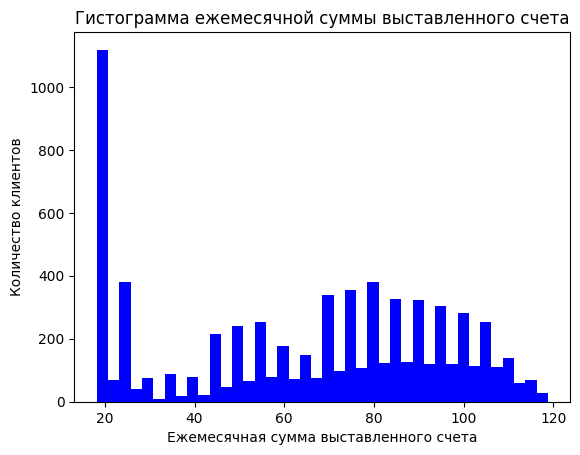

In [3]:
plt.hist(df["MonthlyCharges"], bins=40, color="blue")
plt.xlabel("Ежемесячная сумма выставленного счета")
plt.ylabel("Количество клиентов")
plt.title("Гистограмма ежемесячной суммы выставленного счета")
plt.show()

<Axes: xlabel='TotalCharges', ylabel='Count'>

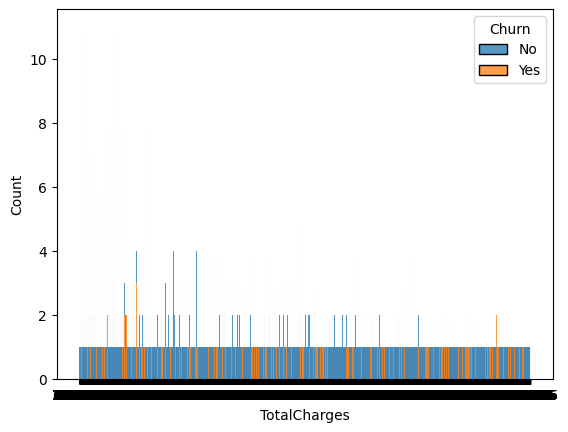

In [4]:
sns.histplot(data=df, x="TotalCharges", hue="Churn", multiple="stack")


In [5]:
#Статистическое описание набора данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Очевидно, что недостающих значений нет. Но пропущенные значения могут быть скрыты. Исследовательский анализ данных даст нам гораздо больше информации о данных.
*******************
Apparemment, il n'y a pas de valeurs manquantes. Mais les valeurs manquantes peuvent être cachées. L'analyse exploratoire des données nous donnera beaucoup plus d'informations sur les données.

In [6]:
#количество уникальных значений для каждого столбца

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Поскольку переменная customerID имеет 7043 различных значения и кадр данных содержит в общей сложности 7043 строки, мы уверены, что каждая строка в наборе данных представляет одного клиента.

Давайте проведем исследовательский анализ данных, чтобы лучше понять их.
**************
Etant donné que la variable customerID (identifiant du client) a 7043 valeurs distinctes et que la dataframe contient au total 7043 lignes, alors nous sommes convaincus que chaque ligne de l'ensemble des données répresente un unique client.

Effectuons une analyse exploratoire des données afin de mieux les comprendre.

### **Эксплораторный анализ данных.**
*********
### **Analyse exploratoire des données.**


Давайте начнем изучение данных с построения наглядного графика распределения каждой переменной.
*************
Commençons notre exploratoire des données en traçant un graphique de visualisation de la distribution de chaque variable.

In [7]:
from pandas.core.arrays import categorical
# категориальные переменные
 
categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()

categorical_columns   #В нем перечислены категориальные переменные, которые имеют более 5 уникальных значений

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [8]:
# Создание функции построения гистограммы и в интерактивном режиме.

def bar_plot(a):
  df[a].value_counts(normalize = True).plot(kind = 'bar')
  plt.ylabel('proportion')
  plt.title('Distribution of ' + str(a))
  return plt.show()

In [9]:
# Interact

interact(bar_plot, a = categorical_columns);

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

Вот некоторые важные выводы, которые можно сделать из приведенных выше графиков:

Клиентов, которые отказались от подписки (более 70%), больше, чем клиентов, которые отказались от подписки (менее 30%). Таким образом, у нас есть проблема дисбаланса, которую мы должны решить, поскольку она может негативно повлиять на производительность моделей классификации, которые мы будем строить.
*********
Voici quelques informations importantes qu'on peut tirer des graphiques ci-dessus:

Il y a plus de clients qui se sont désabonnés (plus de 70%) que de clients qui se sont désabonné (moins de 30%). Donc nous avons un problème de déséquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de classification que nous allons construire.

In [10]:
# Случайная выборка переменной 'TotalCharges'.

df['TotalCharges'].sample(15)

4143    2043.45
639       855.3
3466     1790.8
4438    1222.25
6805    7195.35
1048      572.2
5627     485.25
854      1424.9
537      1955.4
6690    3460.95
1143    1074.65
4471    3273.55
1793     1769.6
6499       20.3
5731     199.45
Name: TotalCharges, dtype: object

Видимо, из-за наличия пробелов в переменной ***TotalCharges*** Pandas рассматривает ее как переменную с *объектными* (строковыми) значениями.
Чтобы решить эту проблему, заменим пробелы на NaN и преобразуем тип ее значений в *float*.
***********
Apparemment c'est à cause de la présence d'espce ua niveay de la variable ***TotalCharges*** que Pandas la considère comme une variables avec des valeurs de type *object* (chaîne de caractère).
Pour resoudre ce problème, nous allons remplacer ces espaces par des NaN et transformer le type de ses valeurs en *float*

In [11]:
# Количественные переменные

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Создание функции построения гистограммы и в интерактивном режиме

def hist_plot(b):
  sns.distplot(df[b], kde=False)
  plt.title('Histogram of '+str(b))
  return plt.show()

# Преобразование типа значений переменной 'TotalCharges' в float

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)


In [12]:
# Interact
interact(hist_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

In [13]:
# Коэффициент перекоса переменной 'TotalCharges

df['TotalCharges'].skew()

0.961642499724251

In [14]:
# Создание функции для создания усатых коробок в интерактивном режиме
def box_plot(b):
  sns.boxplot(y = df[b])
  plt.title('Boxplot of ' + str(b))
  return plt.show()

# Interact

interact(box_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

Мы можем сделать вывод, что выбросов нет. Но эти асимметричные значения могут привести к ошибкам в моделях, которые мы собираемся построить. Для этого мы применим функции преобразования к этим переменным, чтобы сделать их менее асимметричными.

Двумерный анализ.
***********
Nous pouvons conclure qu'il n'y a pas de valeurs abérrantes (outliers). Mais ces valeurs asymétriques peuvent causer des erreurs au niveau des modèles que nous allons construire. Pour cela, nous allons appliquer des fonctions de transformation à ces variables afin de les rendre moins asymétrique.

Analyse bivariées.

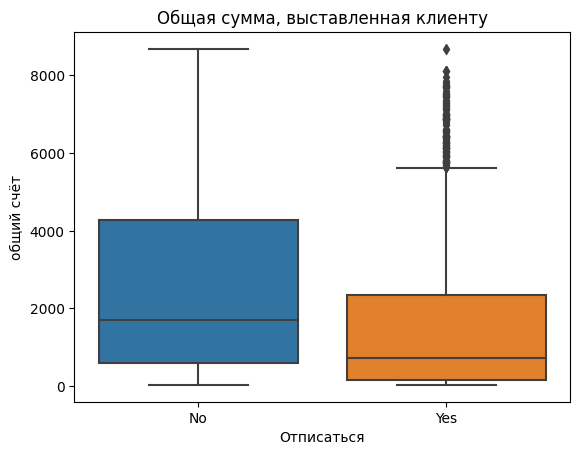

In [15]:
# TotalCharges vs Churn

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.xlabel('Отписаться')
plt.ylabel('общий счёт')
plt.title('Общая сумма, выставленная клиенту')
plt.show()

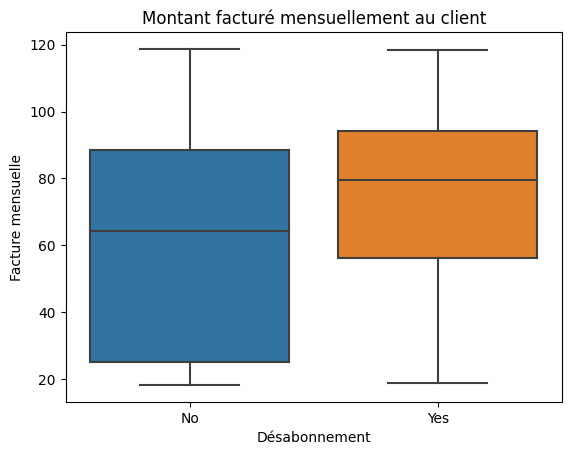

In [16]:
# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture mensuelle')
plt.title('Montant facturé mensuellement au client')
plt.show()

Общая сумма, взимаемая с клиентов, которые расторгли контракт, ниже, чем общая сумма, взимаемая с клиентов, которые этого не сделали. Однако клиентам, которые расторгли контракт, ежемесячно выставляется больший счет, чем клиентам, которые расторгли контракт. Эта информация очень важна для компании, поскольку сумма, выставляемая ежемесячно, может быть важным фактором, определяющим, будет ли клиент отказываться от услуг или нет.
***********
Le montant total facturé aux clients qui ont résilié leur contrat est inférieur au montant total facturé aux clients qui ne l'ont pas fait. Mais les clients qui se sont désabonnés sont plus facturés mensuellement que les clients qui se sont désabonnées. Cette information est très importante pour l'entreprise car le montant facturé mensuellement peut-être un facteur important qui détermine si un client va se désabonner ou non.

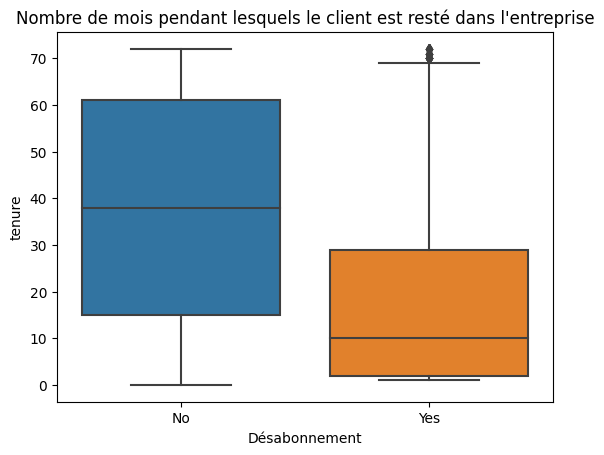

In [17]:
# Tenure vs Churn

sns.boxplot(x='Churn', y='tenure', data=df)
plt.xlabel('Désabonnement') 
plt.title("Nombre de mois pendant lesquels le client est resté dans l'entreprise")
plt.show()

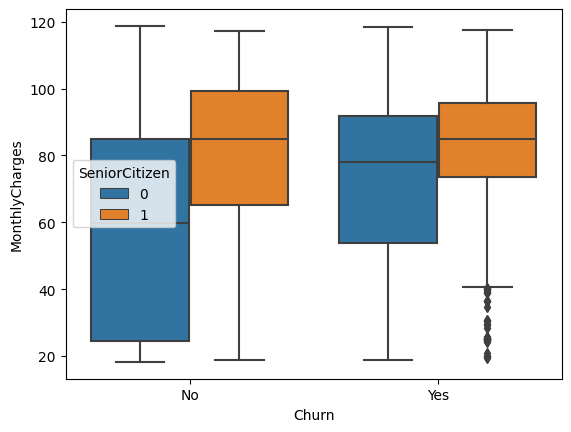

In [18]:
# MonthlyCharges vs Churn by SeniorCitizen

sns.boxplot(x ='Churn', y ='MonthlyCharges', data=df, hue = 'SeniorCitizen');

Похоже, что пожилые люди ежемесячно платят гораздо больше, чем молодые. Несмотря на это, они остаются более лояльными к компании, чем молодые люди.
**************
Il semble que les personnes âgées soient beaucoup plus facturées mensuellement que les jeunes. Malgrés cela, il restent plus fidèles à l'entreprise que les jeunes.

In [19]:
# Статистическое резюме

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### **Предобработка данных**

In [20]:
# Обработка отсутствующих значений

data = df.copy()

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Мы обнаружили, что есть 11 отсутствующих значений в переменной 
*MonthlyCharges*. Мы удалим эти отсутствующие значения.
***********
Nous constatons qu'il y a 11 valeurs manquantes dans la variable 
*MonthlyCharges*. Nous allons supprimer ces valeurs manquantes.

In [21]:
# Удаление недостающих значений

data.dropna(inplace=True)

data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# Кодирование двоичных переменных

data['gender'] = data['gender'].apply(lambda row: 1 if row == 'female' else 0)

binairy_columns = data.drop('gender', axis=1).nunique()[data.drop('gender', axis=1).nunique() < 3].keys().to_list()

binairy_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [24]:
# Мы нашли двоичные переменные. Теперь мы их закодируем.

for column in binairy_columns:
  data[column] = data[column].apply(lambda row: 1 if row == 'Yes' else 0)

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [26]:
# Кодировки остальных категориальных переменных

encoding_cat_vars = data[categorical_columns].nunique()[data[categorical_columns].nunique() > 2].keys().to_list()

encoding_cat_vars_dummies = pd.get_dummies(data=data[encoding_cat_vars], columns=encoding_cat_vars, drop_first=True)

In [27]:
# Новый DataFrame

data = pd.concat([data['gender'], data[binairy_columns], encoding_cat_vars_dummies, data[numerical_columns]], axis=1)

In [28]:
# Отображение нового фрейма данных

data.tail()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7038,0,0,1,1,1,1,0,0,1,0,...,0,1,1,0,0,0,1,24,84.80,1990.50
7039,0,0,1,1,1,1,0,0,1,1,...,0,1,1,0,1,0,0,72,103.20,7362.90
7040,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,11,29.60,346.45
7041,0,0,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,1,4,74.40,306.60
7042,0,0,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,66,105.65,6844.50


Мы видели, что переменная *TotalCharges* очень асимметрична, поэтому давайте преобразуем ее с помощью функции квадратного корня.
************
Nous avons vu que la variable *TotalCharges* est très asymétriques alors transformons-la par une fonction racine carrée.

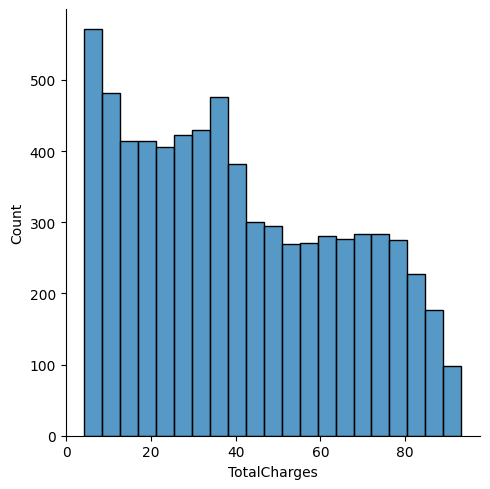

In [29]:
# Преобразование переменной 'TotalCharges'

data['TotalCharges'] = np.sqrt(data['TotalCharges'])

# Гистограмма преобразованных переменных

sns.displot(data['TotalCharges'], kde=False)

In [30]:
# Коэффициент перекоса переменной 'TotalCharges' после преобразования

data['TotalCharges'].skew()

0.3089261418986736

In [31]:
# Данные для обучения 60%, данные для проверки 20% и данные для тестирования 20%.

X = data.drop('Churn', axis = 1)
y = data['Churn']
seed=25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify = y_test)

Важно убедиться, что доли людей, которые прекратили или не прекратили контакты, в разных наборах данных одинаковы.
***********
Il faut s'assurer que les proportions de personnes ayant résilié ou non leur contact soient les mêmes dans les différents ensembles de données.

In [32]:
# Частота классов в y_train

pd.DataFrame(y_train).value_counts(normalize = True)

Churn
0        0.734297
1        0.265703
dtype: float64

In [33]:
# Частота классов в y_val

pd.DataFrame(y_val).value_counts(normalize = True)

Churn
0        0.733997
1        0.266003
dtype: float64

In [34]:
# Частота классов в y_test

pd.DataFrame(y_test).value_counts(normalize = True)

Churn
0        0.734186
1        0.265814
dtype: float64

Теперь мы рассмотрим проблему дисбаланса классов в данных. Когда существует очень большая разница между количеством наблюдений в каждой категории прогнозируемой целевой переменной, это может привести к ошибкам моделирования.

В нашем случае имеется чуть более 73% людей, которые не отменили свою подписку, по сравнению с чуть более 26% или около того, которые отменили свою подписку. Таким образом, существует большой дисбаланс классов. Мы можем использовать повторную выборку для создания большего баланса между классами целевой переменной. Либо мы создаем больше наблюдений в классе меньшинства (модальность 1), т.е. делаем завышенную выборку, либо уменьшаем количество наблюдений в классе большинства (модальность 0), т.е. делаем заниженную выборку.

****************
Nous allons résoudre maintenant le problème de déséquilibre de classe dans les données.
Lorsqu'il a une très grande différence entre le nombre d'observations dans chaque catégorie de variable cible à orédire, cela peut entraîner des erreurs de modélisation.

Dans notre cas ici, il y a un peu plus de 73% de personnes qui n'ont pas résilié leur abonnement contre un peu plus de 26% environ qui ont résilié leur abonnement. Il y a donc un grand déséquilibre de classe. Nous pouvons utiliser le rééchantillonnage pour créer plus d'équilibre entre les catégorie de la variable cible. Soit on crée plus d'observations dans la classe minoritaire (modalité 1) c'est-à-dire on fait un sur-échantillonnage, soit on diminue les observations de la classe majoritaire (modalité 0) c'est-à-dire un sous échantillonnage.

In [35]:
# Решение проблемы дисбаланса классов: метод переборки классов 

X2 = X_train
X2['Churn'] = y_train
minority = X2[X2.Churn == 1]
majority = X2[X2.Churn == 0]

minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state=111)

upsampled = pd.concat([majority, minority_upsampled])

upsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
483,0,0,1,0,1,1,0,1,1,0,...,1,1,0,0,0,0,72,108.50,89.463959,0
845,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,1,15,20.55,17.203197,0
3056,0,0,1,1,1,1,0,1,0,0,...,0,0,1,1,0,0,50,70.50,59.047862,0
2778,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,13,74.65,31.084562,0
6586,0,0,1,1,1,1,0,1,0,1,...,0,0,1,1,0,0,45,24.65,34.224260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,4,77.95,17.479989,1
4757,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,60.10,7.752419,1
4081,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,69.60,8.342661,1
5583,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,26,84.95,46.580575,1


In [36]:
# Верификация

upsampled['Churn'].value_counts(normalize = True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [37]:
# Обучающие данные на основе метода переборки класса меньшинств

X_train_up = upsampled.drop('Churn', axis = 1)

y_train_up = upsampled['Churn']

In [38]:
# Решение проблемы дисбаланса классов: метод выборки по большинству классов

majority_downsampled = resample(majority, replace = False, n_samples = len(minority), random_state=seed)

downsampled = pd.concat([minority, majority_downsampled])

downsampled


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
3200,0,0,1,0,1,1,0,1,1,0,...,1,0,0,0,1,0,54,104.30,72.650877,1
6176,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,1,0,43,77.85,58.015946,1
2175,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,30,85.15,50.555910,1
1486,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,2,55.05,10.136567,1
2074,0,0,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,43,108.15,67.828460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,0,0,1,1,1,1,0,1,1,0,...,1,0,0,0,1,0,46,110.20,70.513119,0
6788,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,25,20.80,21.452273,0
3441,0,0,1,1,1,1,0,0,0,0,...,0,1,0,0,0,1,34,60.80,45.189047,0
1231,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,20,64.40,37.397861,0


In [39]:
# Верификация

downsampled['Churn'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [40]:
# Обучающие данные, основанные на методе субвыборки класса меньшинств

X_train_down = upsampled.drop('Churn', axis = 1)

y_train_down = upsampled['Churn']

In [41]:
# X_train et y_train

#X_train = X_train.drop('Churn', axis=1)

#y_train = X_train['Churn']

In [42]:
# Определение данных для обучения
# Возможные варианты: (X_train, y_train), (X_train_up, y_train_up) и (X_train_down, y_train_down)

train_features = X_train_up

train_labels = y_train_up

In [43]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
483,0,0,1,0,1,1,0,1,1,0,...,0,1,1,0,0,0,0,72,108.50,89.463959
845,0,0,1,1,1,0,0,0,0,1,...,1,0,1,0,0,0,1,15,20.55,17.203197
3056,0,0,1,1,1,1,0,1,0,0,...,0,0,0,1,1,0,0,50,70.50,59.047862
2778,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,13,74.65,31.084562
6586,0,0,1,1,1,1,0,1,0,1,...,1,0,0,1,1,0,0,45,24.65,34.224260


In [44]:
# Стандартизация независимых переменных в различных наборах данных

scaler = MinMaxScaler()
mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)
X_val = mod_scaler.transform(X_val)
X_test = mod_scaler.transform(X_test)

# Преобразование в DataFrame

train_features = pd.DataFrame(train_features, columns = X.columns)
X_val = pd.DataFrame(X_val, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [45]:
train_features.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,6196.0,6196.0,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,...,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,0.0,0.0,0.436895,0.266139,0.906230,0.647676,0.093770,0.442544,0.529535,0.164138,...,0.164138,0.404293,0.169303,0.172692,0.185604,0.418173,0.204648,0.385999,0.498617,0.388649
std,0.0,0.0,0.496042,0.441974,0.291532,0.477733,0.291532,0.496728,0.499167,0.370431,...,0.370431,0.490794,0.375049,0.378011,0.388818,0.493299,0.403477,0.336126,0.286474,0.274397
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056338,0.293408,0.145360
50%,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.309859,0.562189,0.350105
75%,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.676056,0.724502,0.604173
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Моделирование**

Какую метрику следует выбрать для оценки эффективности моделей?

In [46]:
# Выбор лучших переменных-предсказателей

rf = RandomForestClassifier() 

rf.fit(train_features, train_labels)

print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1032
           1       0.60      0.59      0.59       374

    accuracy                           0.78      1406
   macro avg       0.72      0.72      0.72      1406
weighted avg       0.78      0.78      0.78      1406



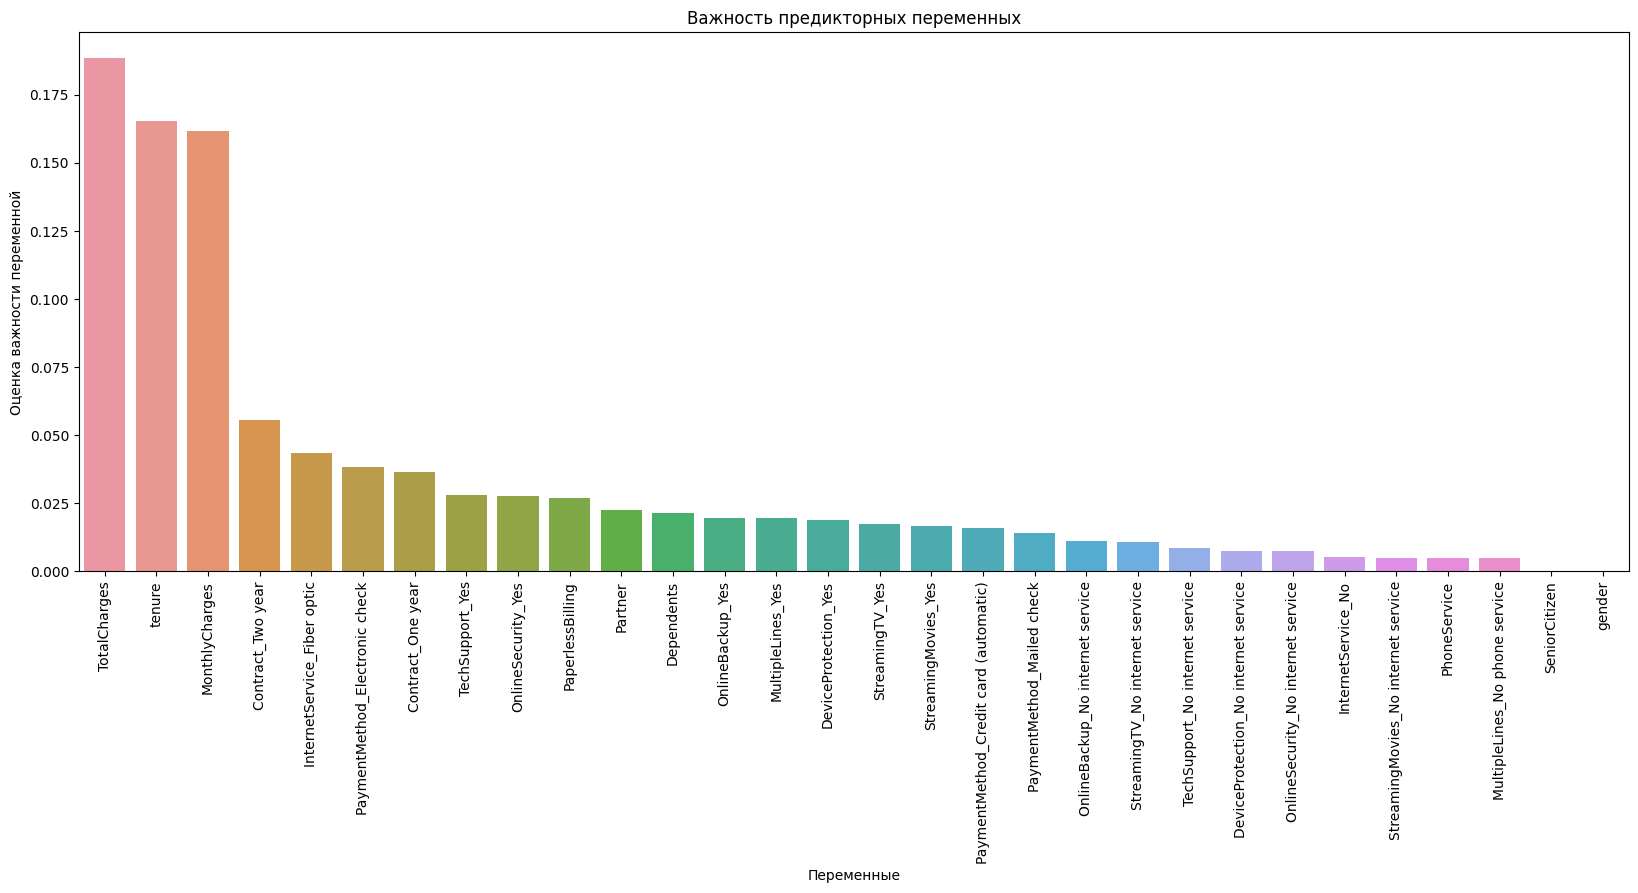

In [47]:
# Важность независимых переменных

vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

plt.figure(figsize=(20, 7))
sns.barplot(x = vars_imp.index, y=vars_imp)
plt.xticks(rotation=90)
plt.xlabel("Переменные")
plt.ylabel("Оценка важности переменной")
plt.title("Важность предикторных переменных")
plt.show()

In [48]:
# Плакат vars_imps

vars_imp


TotalCharges                             0.188561
tenure                                   0.165165
MonthlyCharges                           0.161632
Contract_Two year                        0.055310
InternetService_Fiber optic              0.043273
PaymentMethod_Electronic check           0.038162
Contract_One year                        0.036176
TechSupport_Yes                          0.027969
OnlineSecurity_Yes                       0.027596
PaperlessBilling                         0.026835
Partner                                  0.022527
Dependents                               0.021472
OnlineBackup_Yes                         0.019596
MultipleLines_Yes                        0.019423
DeviceProtection_Yes                     0.018844
StreamingTV_Yes                          0.017303
StreamingMovies_Yes                      0.016407
PaymentMethod_Credit card (automatic)    0.015637
PaymentMethod_Mailed check               0.013977
OnlineBackup_No internet service         0.011139


In [49]:
# Выбранные переменные для алгоритмов

seuil = 0.009
vars_selected = vars_imp[vars_imp > seuil].index.to_list()
train_features = train_features[vars_selected]

X_val = X_val[vars_selected]
X_test = X_test[vars_selected]

In [50]:
# Количество предикторных переменных

len(train_features.columns)

21

Наша цель - построить модель классификации, которая предсказывает, откажется ли клиент от подписки или нет. Мы будем использовать различные алгоритмы (логистическая регрессия, случайный лес, градиентный бустинг, многослойный перцептронный классификатор и машина опорных векторов = SVM), чтобы сравнить их производительность и выбрать лучшую модель.
***************
Notre objectif est de construire un modèle de classification qui prédit si un client va se désabonner ou non. Nous utiliserons différents algorithmes (Logistic Regression, Random Forest, Gradient Boosting, Classificateur Perceptron Multicouche et Support Vector Machine = SVM) afin de comparer leurs performances et de choisir le meilleur modèle.


## **Модель логистической регрессии**.



In [51]:
# Словарь гиперпараметров

param_grid = {'C':[0.001, 0.01, 1, 10, 50, 100, 500]}

# Объект GridSearchCV

grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500), 
                                 param_grid=param_grid, 
                                 scoring='f1', cv=5)

# Обучение алгоритма

logreg_model = grid_logreg_class.fit(train_features, train_labels)

# Лучшая оценка и лучший гиперпараметр

print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)

0.77
LogisticRegression(C=50, max_iter=500, random_state=25)


Модель имеет хороший результат обучения. Давайте оценим ее работу на проверочных данных, чтобы оценить ее способность к обобщению на новых данных.
*******
Le modèle à un bon score d'entraînement. Evaluons sa performance sur les données de validation afin d'apprécier sa capacité à généraliser sur de nouvelles données.

In [52]:
# Функция оценки производительности модели

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  print(classification_report(labels, pred))

In [53]:
# Оценка модели логистической регрессии

model_evaluation(logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1032
           1       0.53      0.81      0.64       374

    accuracy                           0.75      1406
   macro avg       0.72      0.77      0.73      1406
weighted avg       0.81      0.75      0.77      1406



Давайте применим алгоритм Recursive Feature Eliminator (RFE) к модели, чтобы посмотреть, сохраняет ли она ту же производительность, когда мы уменьшаем количество предикторов.
*****************
Appliquons l'algortihme Recursive Feature Eliminator (RFE) sur le modèle afin de voir s'il garde des mêmes performances lorsqu'on réduit le nombre de prédicteurs. en effet, plus le modèle est complexe, plus il est difficile de l'interpréter.

In [54]:
# Создание функции построения модели с использованием алгоритма RFE

def model_with_rfe(model):
  rfe_model = RFE(estimator=model, verbose=0)
  rfe_model.fit(train_features, train_labels)
  mask = rfe_model.support_
  reduce_X = train_features.loc[:, mask]
  return rfe_model

In [55]:
# Логистическая регрессия RFE

rfe_logreg_model = model_with_rfe(logreg_model.best_estimator_)

rfe_logreg_model

RFE(estimator=LogisticRegression(C=50, max_iter=500, random_state=25))

In [56]:
# Оценка модели логистической регрессии с RFE

model_evaluation(rfe_logreg_model, X_val, y_val)


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1032
           1       0.51      0.80      0.63       374

    accuracy                           0.74      1406
   macro avg       0.71      0.76      0.71      1406
weighted avg       0.80      0.74      0.76      1406



RFE сократил количество предикторов с 28 до 14 и не улучшил производительность модели.

Перейдем к алгоритму Random Forest.
***************
Le RFE a réduit le nombre de prédicateurs de 28 à 14 et n'a pas améliore la performance du modèle.

Passons à l'algorithme de forêt aléatoire.

## **Модель Random Forest**

In [57]:
# Словарь гиперпараметров

param_grid_rf = {'n_estimators':[10, 50, 100, 500, 1000], 'max_depth':[3, 5, 10, 20, None]}

# Объект GridSearchCv

grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state=seed),
                             param_grid = param_grid_rf,
                             scoring='f1',
                             cv=5)

# Обучение алгоритма

rf_model = grid_rf_class.fit(train_features, train_labels)

# Лучшая оценка и лучший гиперпараметр

print(round(rf_model.best_score_, 3))
print(rf_model.best_estimator_)

0.905
RandomForestClassifier(random_state=25)


In [58]:
# Оценка модели случайного леса

model_evaluation(rf_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1032
           1       0.58      0.56      0.57       374

    accuracy                           0.78      1406
   macro avg       0.71      0.71      0.71      1406
weighted avg       0.77      0.78      0.78      1406




По сравнению со значениями модели логистической регрессии, модель случайного леса кажется менее эффективной.

Давайте применим RFE.
***********************

Comparé aux valeurs du modèle de regression logistique, le modèle de forêt aléatoire semble moins efficace.

Appliquons une RFE.

In [59]:
# RandomForest с RFE
rfe_forest_model = model_with_rfe(rf_model.best_estimator_)
rfe_forest_model

RFE(estimator=RandomForestClassifier(random_state=25))

In [60]:
# Оценка модели RandomForest с помощью RFE

model_evaluation(rfe_forest_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1032
           1       0.56      0.56      0.56       374

    accuracy                           0.77      1406
   macro avg       0.70      0.70      0.70      1406
weighted avg       0.77      0.77      0.77      1406



Учитывая эти значения, мы сохраним модель случайного леса, полученную без RFE. 

Перейдем к построению модели искусственной нейронной сети.
************
Au vue de ces valeurs, nous retiendrons le modèle de forêt aléatoires obtenu sans RFE. 

Passons à la construction d'un modèle de réseau de neuronne artificiel.

## **Многослойный перцептронный классификатор**

In [61]:
from seaborn.axisgrid import Grid
from sklearn.neural_network import MLPClassifier

# MLPClassifier

mlp = MLPClassifier(random_state=seed, max_iter=1000)
parameters = {'hidden_layer_sizes':[(50,), (100,), (200,)], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'], 
              'learning_rate':['constant', 'invscaling', 'adoptive']}

mlp_cv = GridSearchCV(mlp, parameters, scoring='f1', cv=5)

mlp_cv.fit(train_features, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=25),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adoptive']},
             scoring='f1')

In [62]:
# Лучшая оценка и лучший гиперпараметр

round(mlp_cv.best_score_, 3)

0.856

In [63]:
# Оценка модели перцептрона
model_evaluation(mlp_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1032
           1       0.49      0.60      0.54       374

    accuracy                           0.73      1406
   macro avg       0.67      0.69      0.67      1406
weighted avg       0.75      0.73      0.73      1406



## **Support Vector Machine (SVM)**

In [64]:
# Support Vector Machine: классификатор, который находит оптимальную гиперплоскость, максимизирующую границу между двумя классами.

svm_model = SVC(random_state=seed)

svm_hyp = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10, 50, 100]}

svm_cv = GridSearchCV(svm_model, svm_hyp, scoring='f1', cv=5)

svm_cv.fit(train_features, train_labels)

print(round(svm_cv.best_score_, 3))

print(svm_cv.best_estimator_)

0.854
SVC(C=100, random_state=25)


In [65]:
# Оценка модели SVM

model_evaluation(svm_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.75      0.79      1032
           1       0.47      0.63      0.54       374

    accuracy                           0.71      1406
   macro avg       0.66      0.69      0.67      1406
weighted avg       0.75      0.71      0.73      1406



## ***После этих обученных и оцененных моделей мы можем оставить линейную логистическую модель.***

In [66]:
model_evaluation(logreg_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1032
           1       0.53      0.81      0.64       374

    accuracy                           0.75      1406
   macro avg       0.72      0.77      0.73      1406
weighted avg       0.81      0.75      0.77      1406



In [67]:
model_evaluation(logreg_model.best_estimator_, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.51      0.75      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407

